# Title: Titanic

Chapter 1: Analysis and Feature engineering

* Section 1.1 Data Exploration

* Section 1.2 Visualization

* Section 1.3 Missing value

* Section 1.4 Feature Engineering

Chapter 2: Fit the model

* Section 2.1 Prepare Data for Logistic Regression

* Section 2.2 Fit the model

* Section 2.3 Evaluation

* Section 2.4 Cross validation

* Section 2.5 Predict

### Introduction
https://www.kaggle.com/yanyinggu/titanic-ml/notebook
Logistic regression, limited analysis and feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Chapter 1 Analysis and Feature engineering

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#Check whether there is missing value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Section 1.1 Data Exploration

In [9]:
train.groupby('Survived').mean()
# to further check Pclass and Fare 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
train.groupby('Pclass').mean()
# Higher class and higher Fare has higher chance to survive
# Use columns Pclass and Fare further in the analysis

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
train.groupby('Sex').mean()
# Female has higher chance to survive
# Use columns Sex further in the analysis

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [12]:
train.groupby('Embarked').mean()
# Embarked C has higher chance to survive
# Use columns Embarked further in the analysis

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [13]:
#Other columns: Name, Age, SibSp, Parch, Ticket, Cabin,

### Section 1.2 Visualization

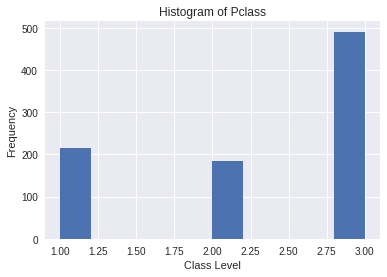

In [14]:
%matplotlib inline
train.Pclass.hist()
plt.title('Histogram of Pclass')
plt.xlabel('Class Level')
plt.ylabel('Frequency')

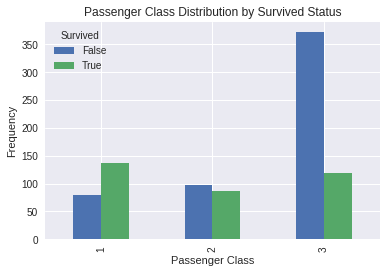

In [15]:
pd.crosstab(train.Pclass, train.Survived.astype(bool)).plot(kind='bar')
plt.title('Passenger Class Distribution by Survived Status')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')

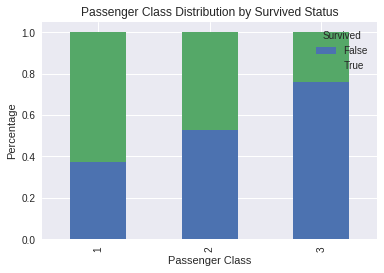

In [16]:
sur_class = pd.crosstab(train.Pclass, train.Survived.astype(bool))
sur_class.div(sur_class.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Passenger Class Distribution by Survived Status')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')

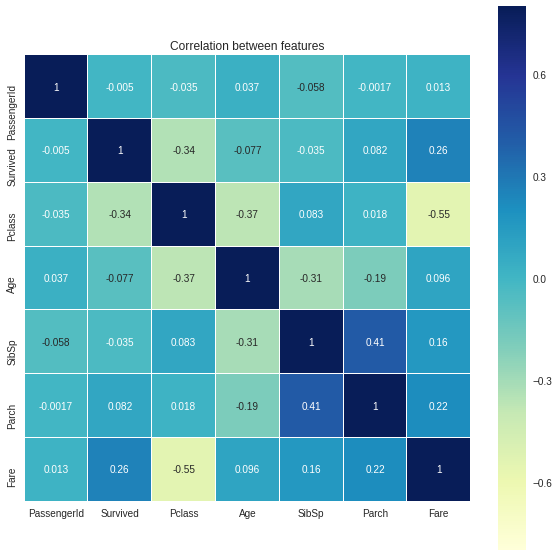

In [17]:
#Correlation
correlation=train.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

### Section 1.3 Missing value

The following filling missing value methods reduces the accuracy of forecast.

In [18]:
# Column Age: Replace missing values with the mean
train.Age.fillna(np.mean(train.Age), inplace = True)
test.Age.fillna(np.mean(test.Age), inplace = True)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#Column Embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


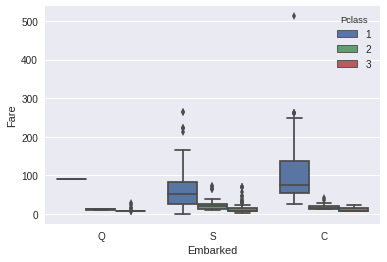

In [20]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test)

In [21]:
# For the two missing values, Fare is 80, Pclass is 1, it high chance that Embarked is C
train['Embarked'] = train['Embarked'].fillna('C')

In [22]:
# Drop rows with missing values
#train.dropna(axis=0, inplace = True)
# too many raws are dropped

In [23]:
#interpolate
from scipy import interpolate
train.interpolate(inplace = True)
train
#test.interpolate()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [24]:
# Column Fare (only for test data set): Replace missing values with the mean
test.Fare.fillna(np.mean(test.Fare), inplace = True)

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [27]:
# For Column Cabin, there are too many missing values.

### Section 1.4 Feature Engineering

In [28]:
# Add new feature, Family
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

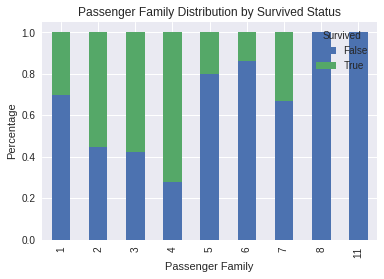

In [29]:
sur_Family = pd.crosstab(train.Family, train.Survived.astype(bool))
sur_Family.div(sur_Family.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Passenger Family Distribution by Survived Status')
plt.xlabel('Passenger Family')
plt.ylabel('Percentage')

In [30]:
# Column Embarked
# Factorize the values 
train_labels,train_levels = pd.factorize(train.Embarked)
test_labels,test_levels = pd.factorize(test.Embarked)
# Save the encoded variables in `iris.Class`
train.Embarked = train_labels
test.Embarked = test_labels
# Print out the first rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [31]:
train_sex = pd.get_dummies(train['Sex'])
train2 = pd.concat([train, train_sex], axis=1)
test_sex = pd.get_dummies(test['Sex'])
test2 = pd.concat([test, test_sex], axis=1)

In [32]:
# filter columns
train3 = train2[['Survived', 'Pclass', 'female', 'Age', 'Family', 'Embarked']]
test3 = test2[['Pclass', 'female', 'Age', 'Family', 'Embarked']]


In [33]:
# logistical regression, X input has a column 'Intercept'
test3['Intercept'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


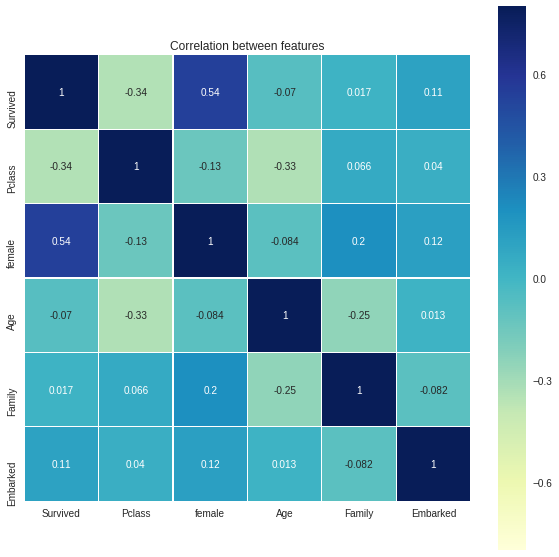

In [34]:
correlation=train3.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# Chapter 2 Logistic Regresssion

### Section 2.1 Prepare Data for Logistic Regression

In [35]:
#splitting into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
y, X = dmatrices('Survived ~ Pclass + female + Age + Family + Embarked',
                  train3, return_type="dataframe")

In [37]:
X.head()
# logistical regression, X input has a column 'Intercept'

,Intercept,Pclass,female,Age,Family,Embarked
0,1.0,3.0,0.0,22.0,2.0,0.0
1,1.0,1.0,1.0,38.0,2.0,1.0
2,1.0,3.0,1.0,26.0,1.0,0.0
3,1.0,1.0,1.0,35.0,2.0,0.0
4,1.0,3.0,0.0,35.0,1.0,0.0


In [38]:
# flatten y into a 1-D array
y = np.ravel(y)

### Section 2.2 Fit the model

In [39]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.80471380471380471

In [40]:
# examine the coefficients
Co = pd.DataFrame(model.coef_)
Co.columns = list(X.columns)
Co

,Intercept,Pclass,female,Age,Family,Embarked
0,1.155187,-1.116655,2.619328,-0.035894,-0.179226,0.285085


### Section 2.3 Evaluation

In [41]:
predicted_train = model.predict(X)
probs_train = model.predict_proba(X)

In [42]:
#Accuracy
metrics.accuracy_score(y, predicted_train)

0.80471380471380471

In [43]:
metrics.roc_auc_score(y, probs_train[:, 1])

0.85372926852650743

In [44]:
#confusion matrix: binary classification, 
#the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, 
#true positives is C_{1,1} 
#and false positives is C_{0,1}.
metrics.confusion_matrix(y, predicted_train)

array([[476,  73],
       [101, 241]])

In [45]:
print(metrics.classification_report(y, predicted_train))

             precision    recall  f1-score   support

        0.0       0.82      0.87      0.85       549
        1.0       0.77      0.70      0.73       342

avg / total       0.80      0.80      0.80       891



### Section 2.4 Cross validation

In [46]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.8         0.77777778  0.78651685  0.83146067  0.83146067  0.78651685
  0.7752809   0.78651685  0.80898876  0.82954545]
0.801406480536


### Section 2.5 Use the model to predict

In [47]:
#splitting into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# predict class labels for the test set
X_test = test3
y_test = model.predict(X_test)
y_test = y_test.astype(int)

In [49]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('titanic.csv', index=False)